<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/Bosque_Aleatorio_primer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

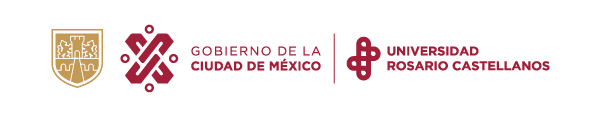

**Actualizado:** Noviembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de bosques aleatorios en un ejemplo simple en Python.   

## Bosques Aleatorios

### Introducción

Los bosques aleatorios son un algoritmo de machine learning que fue introducido por L. Breiman y A. Cutler.  

Estos algoritmos combinan la salida de múltiples árboles de decisión para alcanzar un solo resultado.  

Su facilidad de uso y flexibilidad han impulsado su adopción, ya que maneja problemas de clasificación y regresión.

**Remark.**  

Dado que el modelo de bosques aleatorios se compone de varios árboles de decisión, sería útil que tenga presente el algoritmo del árbol de decisión. Un árbol de decisión, esta compuesto por nodos que representan decisiones o acciones, y ramas que representan las posibles consecuencias de esas decisiones.



### Métodos de conjunto


Los métodos de aprendizaje por conjuntos se componen de un conjunto de clasificadores, por ejemplo, árboles de decisión, y sus predicciones se agregan para identificar el resultado más popular.

El método de conjunto más conocido es la agregación de arranque, introducido por Leo Breiman en su trabajo ["Bagging Predictors"](https://link.springer.com/content/pdf/10.1007/BF00058655.pdf) en 1996; en este método, se selecciona una muestra aleatoria de datos en un conjunto de entrenamiento con reemplazo, lo que significa que los puntos de datos individuales se pueden elegir más de una vez.

Después de generar varias muestras de datos, estos modelos se entrenan de forma independiente y, según el tipo de tarea, es decir, regresión o clasificación, el promedio o la mayoría de esas predicciones arrojan una estimación más precisa.

Si bien los árboles de decisión son algoritmos comunes de aprendizaje supervisado, pueden ser propensos a problemas, como sesgos y sobreajuste. Sin embargo, cuando varios árboles de decisión forman un conjunto en el algoritmo de bosques aleatorios, predicen resultados más precisos, especialmente cuando los árboles individuales no están correlacionados entre sí.



### Bosques Aleatorios

El algoritmo de bosque aleatorio es una extensión del método de ensacado (agregación de arranque), ya que utiliza tanto el ensacado como la aleatoriedad de características para crear un bosque no correlacionado de árboles de decisión.

Aleatoriedad de características, también conocida como agrupación de características o "el método del subespacio aleatorio ", genera un subconjunto aleatorio de características, lo que garantiza una baja correlación entre los árboles de decisión. Ésta es una diferencia clave entre los árboles de decisión y los bosques aleatorios.

Mientras que los árboles de decisión consideran todas las posibles divisiones de características, los bosques aleatorios solo seleccionan un subconjunto de esas características.

### Estructura de los bosques aleatorios

Un bosque aleatorio es un conjunto de árboles de decisión entrenados de manera independiente y luego combinados para realizar predicciones más robustas y precisas.


* Construcción de árboles independientes:  
    Se entrena un conjunto de árboles de decisión utilizando diferentes subconjuntos aleatorios del conjunto de datos de entrenamiento (muestreo bootstrap) y características aleatorias en cada nodo de decisión.

* Diversidad de árboles:  
    La aleatoriedad en la construcción de cada árbol asegura que cada uno aprenda patrones diferentes del conjunto de datos, lo que aumenta la diversidad entre los árboles.

* Votación o promedio:  
    Para la clasificación, las predicciones de cada árbol se combinan mediante votación mayoritaria. Para la regresión, se promedian las predicciones de cada árbol.

En resumen, un bosque aleatorio utiliza la diversidad y la combinación de múltiples árboles de decisión para mejorar la generalización y la precisión del modelo, haciéndolo una poderosa técnica en aprendizaje automático.

**Remark**.  
El muestreo bootstrap es una técnica estadística utilizada para estimar la distribución de una estadística de interés mediante la generación de múltiples muestras de la población original.

En el contexto de los bosques aleatorios, el muestreo bootstrap se utiliza al construir cada árbol de decisión. Cada árbol se entrena con una muestra bootstrap del conjunto de datos original, lo que contribuye a la diversidad entre los árboles y mejora la generalización del modelo final.

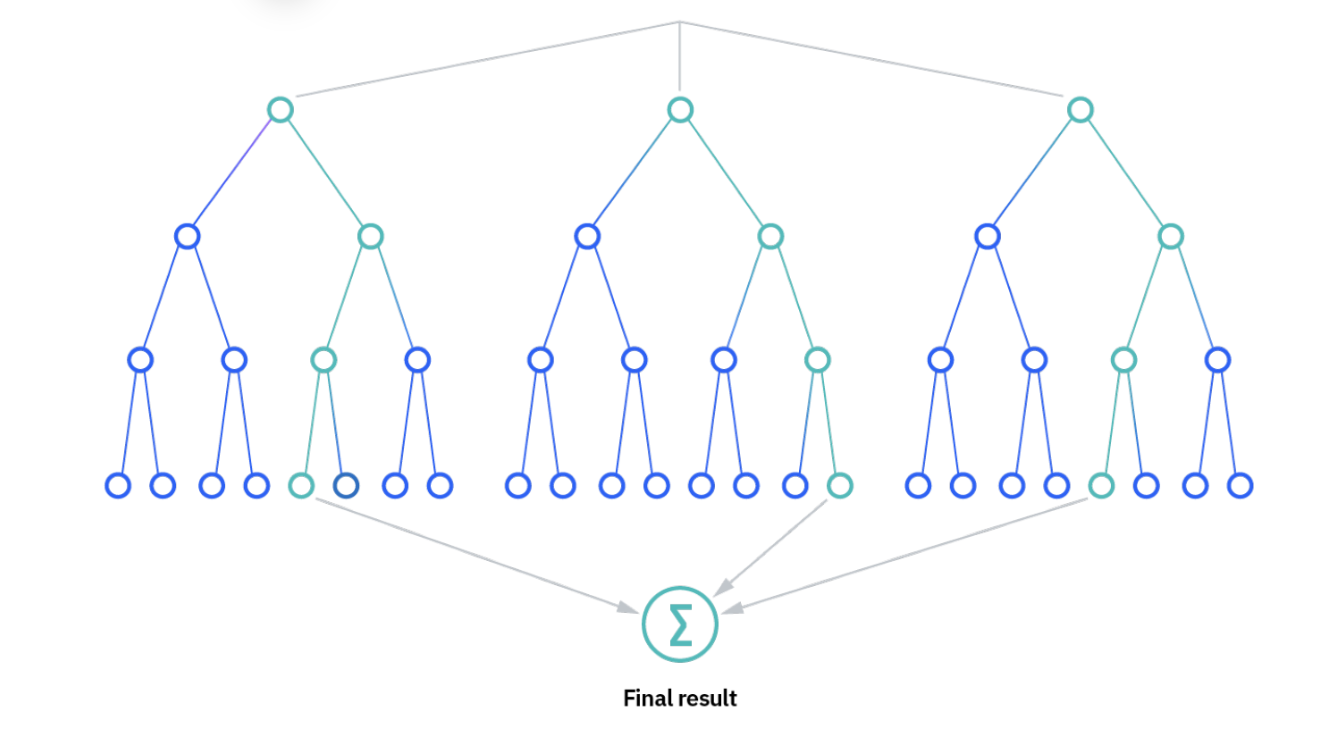

### Ejemplo de implementación de un bosque aleatorio en Python

El objetivo es construir un bosque aleatorio para clasificar el dataset del Iris.





Construimos una clase que se llama `RandomForest`

In [ ]:
# NO EJECUTAR
class RandomForest:
    def __init__(self, n_trees, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []

Los parámetros de la clase son:

* n_trees:  
    Número de árboles en el bosque.
* max_depth:  
    Profundidad máxima de cada árbol.
* min_samples_split:  
    Número mínimo de muestras requeridas para dividir un nodo.
* min_samples_leaf:   
    Número mínimo de muestras requeridas para ser una hoja.
* random_state:   
    Semilla para reproducibilidad.

In [ ]:
 # NO EJECUTAR
    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                min_samples_leaf=self.min_samples_leaf)
            # Bootstrap sample
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

El método `fit` se encarga de entrenar el bosque aleatorio.

Se crea un nuevo árbol de decisión (DecisionTree) en cada iteración del bucle for. Se realiza un muestreo bootstrap seleccionando aleatoriamente muestras del conjunto de datos `X` e `y`. Luego, se entrena el árbol con este conjunto de datos muestreado y se agrega a la lista `self.trees`.

In [ ]:
# NO EJECUTAR
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Use majority voting for classification
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)


La clase completa se ve de la siguiente manera

In [9]:
import numpy as np

class RandomForest:
    def __init__(self, n_trees, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                                min_samples_split=self.min_samples_split,
                                min_samples_leaf=self.min_samples_leaf)
            # Bootstrap sample
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)
            # Agregar print para mostrar el progreso
            # print(f'Árbol {_ + 1} entrenado.')

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Use majority voting for classification
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)

El método `predict` realiza predicciones para un conjunto de datos `X` utilizando todos los árboles en el bosque.

Utiliza el voto mayoritario para la clasificación. La función `np.apply_along_axis` se utiliza para aplicar la función de voto mayoritario a lo largo del eje `0` (a lo largo de las predicciones de cada árbol).

Construimos una clase que se llama `DecisionTree`

In [ ]:
# NO EJECUTAR
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

Los parámetros de la clase son similares a los de la clase `RandomForest`, pero se aplican a cada árbol individual.

In [ ]:
 # NO EJECUTAR
    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1 or len(y) < self.min_samples_split:
            return {'class': np.argmax(np.bincount(y))}

        best_split = self.find_best_split(X, y)

        if best_split is None:
            return {'class': np.argmax(np.bincount(y))}

        left_indices = X[:, best_split['feature']] < best_split['threshold']
        right_indices = ~left_indices

        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': best_split['feature'], 'threshold': best_split['threshold'],
                'left': left_subtree, 'right': right_subtree}


El método `fit` se encarga de construir el árbol de decisión recursivamente.

Si se alcanza la profundidad máxima (`self.max_depth`), si todas las muestras pertenecen a una sola clase o si hay menos muestras que `self.min_samples_split`, se devuelve un diccionario que representa una hoja con la clase mayoritaria.

De lo contrario, se busca la mejor división (`best_split`) en el conjunto de datos y se divide el árbol en dos ramas izquierda (`left_subtree`) y derecha (`right_subtree`). Se utiliza la recursividad para construir las ramas del árbol.

In [ ]:
# NO EJECUTAR
    def find_best_split(self, X, y):
        m, n = X.shape
        if m < self.min_samples_split:
            return None

        num_classes = len(set(y))
        best_gini = float('inf')
        best_split = {}

        for feature_index in range(n):
            feature_values = set(X[:, feature_index])
            for threshold in feature_values:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gini = self.calculate_gini(y[left_indices], y[right_indices], num_classes)

                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature': feature_index, 'threshold': threshold, 'gini': gini}

        return best_split if best_gini < float('inf') else None


El método `find_best_split` busca la mejor división en el conjunto de datos para minimizar la impureza de Gini. Itera a través de todas las características y valores posibles de umbral para encontrar la mejor división.

In [ ]:
  # NO EJECUTAR
    def calculate_gini(self, left, right, num_classes):
        m = len(left) + len(right)
        weight_left = len(left) / m
        weight_right = len(right) / m

        gini_left = 1.0 - sum((np.sum(left == c) / len(left))**2 for c in range(num_classes))
        gini_right = 1.0 - sum((np.sum(right == c) / len(right))**2 for c in range(num_classes))

        gini = weight_left * gini_left + weight_right * gini_right
        return gini


El método `calculate_gini` calcula la impureza de Gini para un nodo dividido en dos conjuntos.

**Remark.**  
La impureza de Gini, es una medida de cuán mezcladas están las clases en un conjunto de datos. Se utiliza comúnmente en bosques aleatorios como un criterio para tomar decisiones sobre cómo dividir los datos en cada nodo del árbol.

Lo anterior, se calcula para un nodo dado considerando la proporción de cada clase en ese nodo. Un valor de Gini más bajo indica una mayor pureza, es decir, un nodo donde la mayoría de las muestras pertenecen a una sola clase.


La fórmula general para calcular la impureza de Gini es:

$$Gini(t) = 1 - \sum_{i=1}^{C} p(i|t)^2$$

Donde:
- $t$ es el nodo.
- $C$ es el número de clases.
- $p(i|t)$ es la proporción de muestras de la clase $i$ en el nodo $t$.


In [ ]:
  # NO EJECUTAR
    def predict(self, X):
        return np.array([self.predict_instance(x) for x in X])

    def predict_instance(self, x, node=None):
        if node is None:
            node = self.tree

        if 'class' in node:
            return node['class']

        if x[node['feature_index']] < node['threshold']:
            return self.predict_instance(x, node['left'])
        else:
            return self.predict_instance(x, node['right'])


El método `predict` se encarga de realizar predicciones para un conjunto de datos utilizando el árbol de decisión. El método `predict_instance` realiza la predicción para una instancia específica descendiendo por el árbol hasta llegar a una hoja.



La clase completa se ve de la siguiente manera

In [10]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1 or len(y) < self.min_samples_split:
            self.tree = {'class': np.argmax(np.bincount(y))}
            return self.tree

        best_split = self.find_best_split(X, y)

        if best_split is None:
            self.tree = {'class': np.argmax(np.bincount(y))}
            return self.tree

        left_indices = X[:, best_split['feature']] < best_split['threshold']
        right_indices = ~left_indices

        self.tree = {'feature_index': best_split['feature'], 'threshold': best_split['threshold'],
                     'left': {}, 'right': {}}

        self.tree['left'] = self.fit(X[left_indices], y[left_indices], depth + 1)
        self.tree['right'] = self.fit(X[right_indices], y[right_indices], depth + 1)

        return self.tree

    def find_best_split(self, X, y):
        m, n = X.shape
        if m < self.min_samples_split:
            return None

        num_classes = len(set(y))
        best_gini = float('inf')
        best_split = {}

        for feature_index in range(n):
            feature_values = set(X[:, feature_index])
            for threshold in feature_values:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gini = self.calculate_gini(y[left_indices], y[right_indices], num_classes)

                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature': feature_index, 'threshold': threshold, 'gini': gini}

        return best_split if best_gini < float('inf') else None

    def calculate_gini(self, left, right, num_classes):
        m = len(left) + len(right)
        weight_left = len(left) / m
        weight_right = len(right) / m

        gini_left = 1.0 - sum((np.sum(left == c) / len(left))**2 for c in range(num_classes))
        gini_right = 1.0 - sum((np.sum(right == c) / len(right))**2 for c in range(num_classes))

        gini = weight_left * gini_left + weight_right * gini_right
        return gini

    def predict(self, X):
        return np.array([self.predict_instance(x) for x in X])

    def predict_instance(self, x, node=None):
        if node is None:
            node = self.tree

        if 'class' in node:
            return node['class']

        if x[node['feature_index']] < node['threshold']:
            return self.predict_instance(x, node=node['left'])
        else:
            return self.predict_instance(x, node=node['right'])


utilizamos la clases anteriores con el dataset del Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de bosque aleatorio
random_forest = RandomForest(n_trees=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

## Medición de Errores

In [12]:
from sklearn.metrics import accuracy_score
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.36666666666666664


La precisión o el error en un bosque aleatorio se miden comúnmente utilizando métricas como la precisión (accuracy).  


Estas métricas evalúan qué tan bien el modelo de un bosque aleatorio se ajusta a los datos de entrenamiento y cuán bien generaliza para hacer predicciones precisas en datos no vistos.


* __Precisión (Accuracy):__  
    La precisión mide la proporción de predicciones correctas realizadas por el modelo en el conjunto de datos. Se calcula dividiendo el número de predicciones correctas por el número total de predicciones.
    
    Una alta precisión indica que el modelo está haciendo predicciones precisas.

Es importante destacar que la precisión puede no ser suficiente para evaluar completamente un modelo de árbol de decisión, especialmente cuando hay clases desequilibradas en los datos. En tales casos, se pueden considerar otras métricas, la puntuación F1 y la matriz de confusión.
